In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout, Dense, LSTM, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
import pandas as pd
import tensorflow.keras.utils as ku

In [0]:
def get_data():
    df = pd.read_csv("/content/drive/My Drive/songdata.csv")['text'].values.tolist()
    return df

corpus = " ".join(get_data())
corpus = corpus.lower().split("\n")

In [3]:
print("Corpus Prepared", "\n", "="*32, "\n")

Corpus Prepared 



In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

word_index = tokenizer.word_index
total_words = len(word_index) + 1

print("Vocab Size", total_words)

Vocab Size 91677


In [0]:
sequences = []

for line in corpus:
    sequence = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(sequence)):
        each_line = sequence[:i+1]
        sequences.append(each_line)

In [6]:
max_len = max([len(x) for x in sequences])
input_sequences = pad_sequences(sequences, maxlen=max_len, padding="pre")
input_sequences = input_sequences[:10000, :]

print("Data Shape", input_sequences.shape)

Data Shape (10000, 28)


In [9]:
print("Preparing Model\n")
model = Sequential()
model.add(Embedding(total_words, 100, input_shape=(max_len-1,)))
model.add(Bidirectional(LSTM(150, activation=tf.nn.relu, return_sequences=True)))
# model.add(Bidirectional(LSTM(100, activation=tf.nn.relu, return_sequences=True)))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(1000, activation=tf.nn.relu))
model.add(Dense(total_words, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["acc"])
print(model.summary())

Preparing Model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 27, 100)           9167700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 27, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_3 (Dense)              (None, 91677)             91768677  
Total params: 101,498,977
Trainable params: 101,498,977
Non-trainable params: 0
_______________________

In [10]:
history = model.fit(input_sequences[:, :-1],
                    input_sequences[:, -1],
                    batch_size=64,
                    epochs=100, verbose=1)

Epoch 1/100
157/157 [==============================] - 33s 208ms/step - loss: 7.1555 - acc: 0.0348
Epoch 2/100
157/157 [==============================] - 32s 206ms/step - loss: 6.0606 - acc: 0.0407
Epoch 3/100
157/157 [==============================] - 32s 206ms/step - loss: 5.9995 - acc: 0.0393
Epoch 4/100
157/157 [==============================] - 32s 206ms/step - loss: 5.9788 - acc: 0.0396
Epoch 5/100
157/157 [==============================] - 32s 206ms/step - loss: 5.9766 - acc: 0.0403
Epoch 6/100
157/157 [==============================] - 33s 208ms/step - loss: 5.9685 - acc: 0.0391
Epoch 7/100
157/157 [==============================] - 32s 207ms/step - loss: 5.9574 - acc: 0.0398
Epoch 8/100
157/157 [==============================] - 32s 206ms/step - loss: 5.9545 - acc: 0.0398
Epoch 9/100
157/157 [==============================] - 33s 208ms/step - loss: 5.9465 - acc: 0.0417
Epoch 10/100
157/157 [==============================] - 33s 208ms/step - loss: 5.9445 - acc: 0.0421
Epoch 11/

In [0]:
model.save("./song_lyrics_generator.h5")

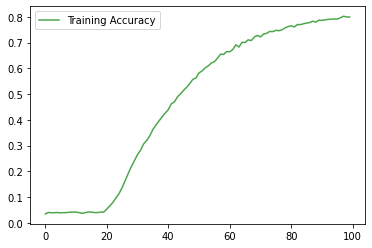

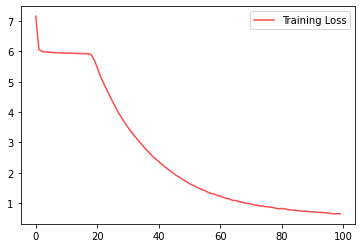

In [14]:
from matplotlib import pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

plt.plot(acc, 'g', label='Training Accuracy', alpha=0.7)
plt.legend()
plt.show()

plt.plot(loss, 'r', label='Training Loss', alpha=0.7)
plt.legend()
plt.show()

In [0]:
model.save("/content/drive/My Drive/lyric_generatorE100.h5")

In [27]:
import numpy as np

next_words = 200
seed = "you just want"

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], padding='pre', maxlen=max_len-1)
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in word_index.items():
        if index == predicted:
            output_word = word
            break
    seed += " " + output_word
print("Generated Text\n", seed)

Generated Text
 you just want to hurt you baby i don't want to see you cry on your eye will try once more like a number one says that's all very fine makes me cry is your way to fly wing to show it wait and open seventeen care what to feels would sad so back to show to want to meet for those fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine fine near the fireplace song chiquitita tell me one before your eyes there's like a song to see her face it's a memory a night of our own tale young and night we lies above no sees me sweet only seventeen care what to feels having what more out of myself to grow in size dam seems to die care what is fine we climb above out 'cause kind of fun will we makes myself would fine makes me cry and to found wild come from out of myself too makes me cry break of your break that has it take me laugh for me thing for the better that can turn you loose deny
